# Data Scientist vs Data Analyst Comparison

In [1]:
# Import Required Python Packages
import pandas as pd
import pandasql as pq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn to a style for the whole notebook
sns.set(style = 'ticks', palette = ['#47b0aa','#e57872'], rc = {'axes.facecolor':'#e0e0e0'})

# Data Collection and Cleaning

In [2]:
# Import Jobs Data
# Data From kaggle https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data

jobs = pd.read_csv('D:\Learning\Portfolio\Jobs & Salaries Data\\jobs_in_data.csv')

jobs.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [3]:
# Checking the information for jobs
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [4]:
# Looking at the insights for each row of Jobs
jobs.describe(include = 'all')

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
count,9355.000000,9355,9355,9355,9355.000000,9355.000000,9355,9355,9355,9355,9355,9355
unique,NaN,125,10,11,NaN,NaN,83,4,4,3,70,3
top,NaN,Data Engineer,Data Science and Research,USD,NaN,NaN,United States,Senior,Full-time,In-person,United States,M
freq,NaN,2195,3014,8591,NaN,NaN,8086,6709,9310,5730,8132,8448
mean,2022.760449,NaN,NaN,NaN,149927.981293,150299.495564,NaN,NaN,NaN,NaN,NaN,NaN
std,0.519470,NaN,NaN,NaN,63608.835387,63177.372024,NaN,NaN,NaN,NaN,NaN,NaN
min,2020.000000,NaN,NaN,NaN,14000.000000,15000.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2023.000000,NaN,NaN,NaN,105200.000000,105700.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2023.000000,NaN,NaN,NaN,143860.000000,143000.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2023.000000,NaN,NaN,NaN,187000.000000,186723.000000,NaN,NaN,NaN,NaN,NaN,NaN


# Data Transformation

In [5]:
# Collecting the numbers of records for each location and their weight on the overall data for both 
# Data Analyst and Data Scientist

# Filtering The jobs by Data Anaylst or Data Scientist
filtered_jobs = jobs.query('job_title == "Data Analyst" or job_title == "Data Scientist"')[['company_location', 'job_title']]

# Calculating the Percentage of each job_title in each country
jobs_count = filtered_jobs.value_counts().to_frame(name = 'count')
jobs_count['dataset_total_%'] = round((jobs_count['count']/jobs_count.values.sum())*100,2)

# Sorting values
jobs_count.reset_index().sort_values(by=['count', 'dataset_total_%'],ascending =[False, False])

,company_location,job_title,count,dataset_total_%
0,United States,Data Scientist,1720,50.93
1,United States,Data Analyst,1219,36.10
2,United Kingdom,Data Analyst,85,2.52
3,United Kingdom,Data Scientist,78,2.31
4,Canada,Data Scientist,65,1.92
5,Spain,Data Scientist,52,1.54
6,Canada,Data Analyst,29,0.86
7,Spain,Data Analyst,16,0.47
8,France,Data Scientist,15,0.44
9,Germany,Data Scientist,14,0.41


In [6]:
# Creating job_sorted which will contain 96% of the data for Data Scientist and Data Analyst
# Taking United States, United Kingdom, Canada and Spain. Will give us a perfect pair for each

job_sorted = jobs.copy()

# Using Queries to create job_sorted with the requirements above
job_sorted = job_sorted.query("job_title in ['Data Scientist', 'Data Analyst'] and company_location in ['United States', 'United Kingdom', 'Canada', 'Spain']")

job_sorted.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
5,2023,Data Scientist,Data Science and Research,USD,130000,130000,United States,Senior,Full-time,Remote,United States,M
6,2023,Data Scientist,Data Science and Research,USD,100000,100000,United States,Senior,Full-time,Remote,United States,M
13,2023,Data Scientist,Data Science and Research,GBP,35000,43064,United Kingdom,Mid-level,Full-time,In-person,United Kingdom,M


In [7]:
# Dropping rows with Freelance and Contract as we only want Full and Part Time

job_sorted = job_sorted.query("employment_type != 'Contract' and employment_type != 'Freelance'")

In [8]:
# Dropping repitive columns and company_size
job_sorted.drop(columns = {'company_size','salary_currency','salary'}, inplace = True)

# Rename work_year and salary_in_usd to be user friendly
job_sorted.rename(columns = {'work_year': 'year', 'salary_in_usd': 'salary'}, inplace = True)

job_sorted

,year,job_title,job_category,salary,employee_residence,experience_level,employment_type,work_setting,company_location
3,2023,Data Scientist,Data Science and Research,212000,United States,Senior,Full-time,In-person,United States
4,2023,Data Scientist,Data Science and Research,93300,United States,Senior,Full-time,In-person,United States
5,2023,Data Scientist,Data Science and Research,130000,United States,Senior,Full-time,Remote,United States
6,2023,Data Scientist,Data Science and Research,100000,United States,Senior,Full-time,Remote,United States
13,2023,Data Scientist,Data Science and Research,43064,United Kingdom,Mid-level,Full-time,In-person,United Kingdom
...,...,...,...,...,...,...,...,...,...
9339,2021,Data Scientist,Data Science and Research,73000,United States,Mid-level,Full-time,In-person,United States
9342,2020,Data Scientist,Data Science and Research,118000,United States,Mid-level,Full-time,Remote,United States
9343,2020,Data Scientist,Data Science and Research,138350,United States,Mid-level,Full-time,Remote,United States
9351,2020,Data Scientist,Data Science and Research,412000,United States,Senior,Full-time,Remote,United States


# Statistical Anaylsis

In [19]:
# Creating exp_level using queries that will have the count of employees in each experience level
# Entry-level, mid-level, senior and Executive

query = """select job_title, experience_level, count(experience_level) as total
from job_sorted
group by job_title , experience_level
order by job_title , total"""

exp_level = pq.sqldf(query, locals())
exp_level

,job_title,experience_level,total
0,Data Analyst,Executive,14
1,Data Analyst,Entry-level,110
2,Data Analyst,Mid-level,344
3,Data Analyst,Senior,880
4,Data Scientist,Executive,30
5,Data Scientist,Entry-level,70
6,Data Scientist,Mid-level,285
7,Data Scientist,Senior,1529


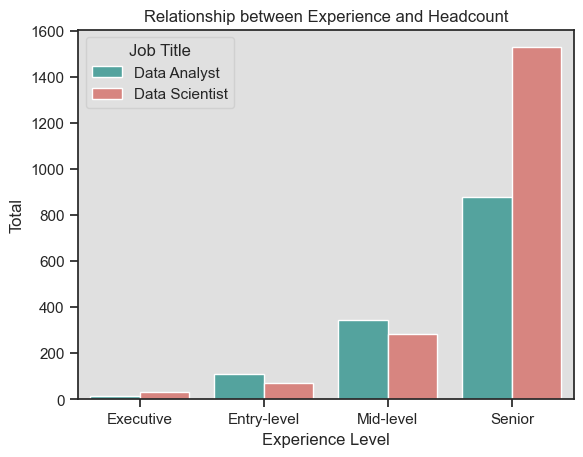

In [20]:
# Plotting a bar graph for exp_level

sns.barplot(data = exp_level, x = 'experience_level', y = 'total', hue = 'job_title')
plt.xlabel("Experience Level")
plt.ylabel("Total")
plt.title("Relationship between Experience and Headcount")
plt.legend(title="Job Title")
plt.show()

In [22]:
# Creating emp_type_total using queries that has the count of employees in each employment type
# Employment types are Full time and Part time

query1 = """select job_title, employment_type, count(employment_type) as total
from job_sorted
group by job_title , employment_type
order by job_title, total"""

emp_type_total = pq.sqldf(query1, locals())
emp_type_total

,job_title,employment_type,total
0,Data Analyst,Part-time,3
1,Data Analyst,Full-time,1345
2,Data Scientist,Part-time,2
3,Data Scientist,Full-time,1912


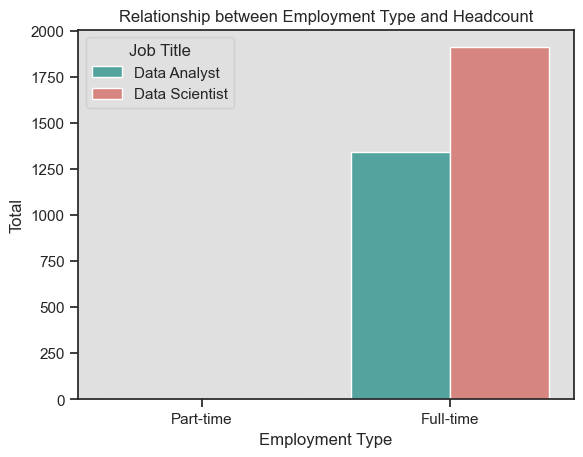

In [23]:
# Plotting a bar graph of emp_type_total

sns.barplot(data = emp_type_total, x = 'employment_type', y ='total', hue = 'job_title')
plt.xlabel("Employment Type")
plt.ylabel("Total")
plt.title("Relationship between Employment Type and Headcount")
plt.legend(title="Job Title")
plt.show()

In [24]:
# Creating work_total using queries to get the count of employees in each work setting
# Work settings are Hybrid, in-person and remote

query2 = """select Job_title, work_setting , count(work_setting) as total
from job_sorted
group by job_title, work_setting
order by job_title , total"""

work_total = pq.sqldf(query2 , locals())

work_total

,job_title,work_setting,total
0,Data Analyst,Hybrid,8
1,Data Analyst,Remote,577
2,Data Analyst,In-person,763
3,Data Scientist,Hybrid,15
4,Data Scientist,Remote,773
5,Data Scientist,In-person,1126


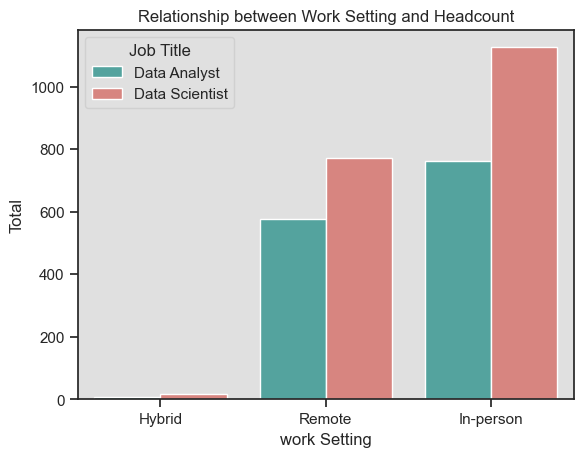

In [25]:
# Plotting a bar graph for work_total

sns.barplot(data = work_total, x = 'work_setting', y = 'total', hue = 'job_title')
plt.xlabel("work Setting")
plt.ylabel("Total")
plt.title("Relationship between Work Setting and Headcount")
plt.legend(title="Job Title")
plt.show()

In [26]:
# Creating a table job_salary
# Showing min, max and average salary for Data analyst and Data Scientist

query3 = """select job_title, round(avg(salary),2) as avg_salary, min(salary) as min_salary, max(salary) as max_salary
from job_sorted
group by job_title"""

job_salary = pq.sqldf(query3 , locals())
job_salary

,job_title,avg_salary,min_salary,max_salary
0,Data Analyst,111416.57,20000,430967
1,Data Scientist,160265.39,24000,412000


In [29]:
# Creating a table employ_salary
# Comparing average salary to employment type

query4 = """select job_title, employment_type, round(avg(salary),2) as avg_salary
from job_sorted
group by job_title, employment_type"""

empoly_salary = pq.sqldf(query4 , locals())
empoly_salary

,job_title,employment_type,avg_salary
0,Data Analyst,Full-time,111527.58
1,Data Analyst,Part-time,61646.67
2,Data Scientist,Full-time,160332.98
3,Data Scientist,Part-time,95650.00


In [31]:
# Creating a table sal_table
# Comparing averaage salary to experience level

query5 = """Select job_title, employment_type, experience_level, round(avg(salary),2) as avg_salary
from job_sorted
group by job_title, employment_type, experience_level
order by job_title, salary"""

sal_table = pq.sqldf(query5, locals())
sal_table

,job_title,employment_type,experience_level,avg_salary
0,Data Analyst,Part-time,Entry-level,61646.67
1,Data Analyst,Full-time,Entry-level,74872.24
2,Data Analyst,Full-time,Mid-level,100520.03
3,Data Analyst,Full-time,Executive,114107.14
4,Data Analyst,Full-time,Senior,120246.45
5,Data Scientist,Full-time,Mid-level,123595.06
6,Data Scientist,Full-time,Entry-level,99546.87
7,Data Scientist,Part-time,Entry-level,95650.00
8,Data Scientist,Full-time,Senior,169330.28
9,Data Scientist,Full-time,Executive,188563.07


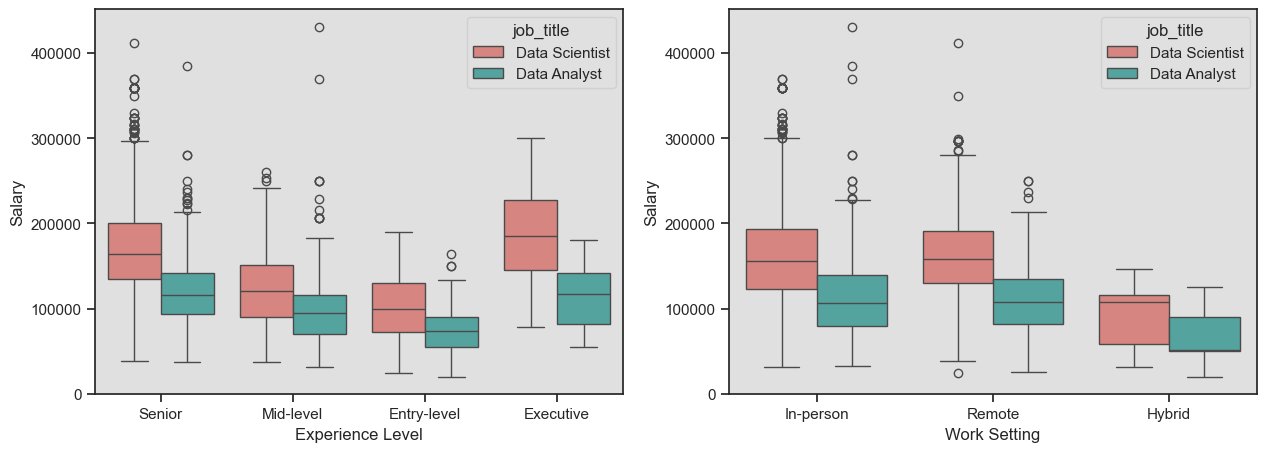

In [42]:
# Plotting a box whisker for Experience Level compared to salary and Work setting compared to salary

# Setting plotting size
plt.figure(figsize = (15,5))
adj_palette = ['#e57872', '#47b0aa']

# Plotting Experience level box and whisker 
plt.subplot(121)
sns.boxplot(data = job_sorted, x= 'experience_level', y = 'salary', hue = 'job_title', palette = adj_palette)
plt.xlabel('Experience Level')
plt.ylabel('Salary')

# Plotting Work Setting box and whisker
plt.subplot(122)
sns.boxplot(data = job_sorted, x= 'work_setting', y = 'salary', hue = 'job_title', palette = adj_palette)
plt.xlabel('Work Setting')
plt.ylabel('Salary')

#Displaying
plt.show()

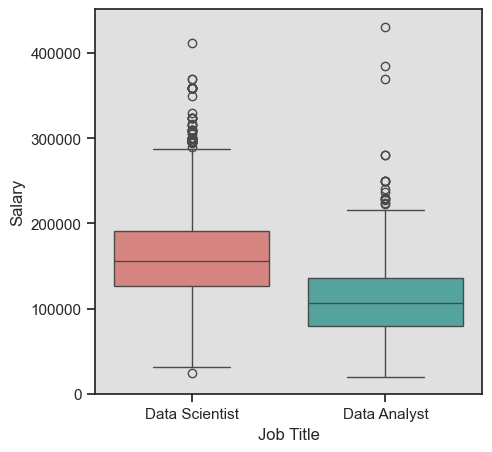

In [41]:
# Plotting a box and whisker for salaries to compare data analyst and data scientist

# Setting plot size
plt.figure(figsize = (5,5))

#Plotting Salaries
sns.boxplot(data = job_sorted, x = 'job_title', y ='salary', hue = 'job_title', palette = adj_palette)
plt.xlabel('Job Title')
plt.ylabel('Salary')

#Displaying
plt.show()